In [76]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

In [77]:
pwd

'C:\\Users\\jinit jain\\Desktop\\MLGIT\\CNN\\3'

In [78]:
my_data_dir='C:\\Users\\jinit jain\\Desktop\\MLGIT\\CNN\\3\\dataset'

In [79]:
os.listdir(my_data_dir)

['test_set', 'training_set']

In [80]:
test_path=my_data_dir+'\\test_set'
train_path=my_data_dir+'\\training_set'

In [81]:
os.listdir(test_path)

['cats', 'dogs']

In [82]:
os.listdir(train_path)

['cats', 'dogs']

In [83]:
os.listdir(test_path+'\\cats\\')[0]

'cat.4001.jpg'

In [84]:
os.listdir(train_path+'\\cats\\')[0]

'cat.1.jpg'

In [85]:
os.listdir(train_path+'\\dogs\\')[0]

'dog.1.jpg'

In [86]:
os.listdir(test_path+'\\dogs\\')[0]

'dog.4001.jpg'

In [87]:
cat_test_img=test_path+'\\cats'+'\\cat.4001.jpg'
cat_train_img=train_path+'\\cats'+'\\cat.1.jpg'
dog_test_img=test_path+'\\dogs'+'\\dog.4001.jpg'
dog_train_img=train_path+'\\dogs'+'\\dog.1.jpg'


In [88]:
cat_test_imgread=imread(cat_test_img)
cat_train_imgread=imread(cat_train_img)
dog_test_imgread=imread(dog_test_img)
dog_train_imgread=imread(dog_train_img)


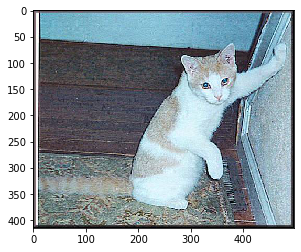

In [89]:
plt.imshow(cat_test_imgread)

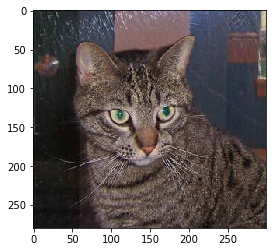

In [90]:
plt.imshow(cat_train_imgread)

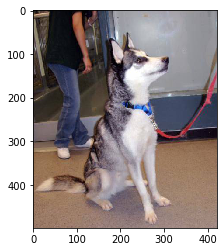

In [91]:
plt.imshow(dog_test_imgread)

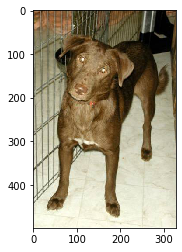

In [92]:
plt.imshow(dog_train_imgread)

In [93]:
len(os.listdir(test_path+'\\cats\\'))

1000

In [94]:
len(os.listdir(train_path+'\\cats\\'))

4000

In [95]:
print(cat_test_imgread.shape)
print(cat_train_imgread.shape)
print(dog_test_imgread.shape)
print(dog_train_imgread.shape)

(415, 498, 3)
(280, 300, 3)
(499, 421, 3)
(499, 327, 3)


In [96]:
# Other options: https://stackoverflow.com/questions/1507084/how-to-check-dimensions-of-all-images-in-a-directory-using-python
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'\\dogs'):
    
    img = imread(test_path+'\\dogs'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

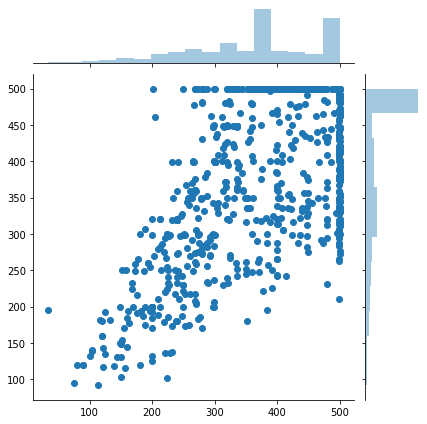

In [97]:
import seaborn as sns
sns.jointplot(dim1,dim2)

In [98]:
np.mean(dim1)

365.171

In [99]:
np.mean(dim2)

396.317

In [100]:
img_shape=(370,370,3)

In [101]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [102]:
image_gen = ImageDataGenerator(rotation_range=10, # rotate the image 10 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

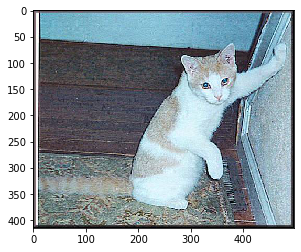

In [103]:
plt.imshow(cat_test_imgread)

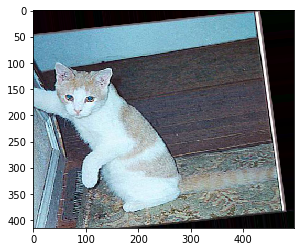

In [104]:
plt.imshow(image_gen.random_transform(cat_test_imgread))

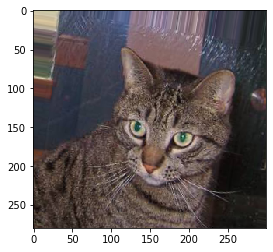

In [105]:
plt.imshow(image_gen.random_transform(cat_train_imgread))

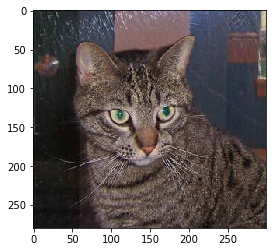

In [106]:
plt.imshow((cat_train_imgread))

### Generating many manipulated images from a directory


In order to use .flow_from_directory, you must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

In [107]:
image_gen.flow_from_directory(train_path)

Found 8000 images belonging to 2 classes.


In [108]:
image_gen.flow_from_directory(test_path)

Found 2000 images belonging to 2 classes.


In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [110]:
img_shape=(370,370,3)

In [111]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=img_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=img_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=img_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [112]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 368, 368, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 184, 184, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 182, 182, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 91, 91, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 89, 89, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 44, 44, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 123904)           

In [113]:
from tensorflow.keras.callbacks import EarlyStopping

In [114]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [115]:
batch_size = 16

In [116]:
img_shape[:2]

(370, 370)

In [117]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=img_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 8000 images belonging to 2 classes.


In [118]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=img_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2000 images belonging to 2 classes.


In [119]:
train_image_gen.class_indices

{'cats': 0, 'dogs': 1}

In [120]:
test_image_gen.class_indices

{'cats': 0, 'dogs': 1}

In [121]:
import warnings
warnings.filterwarnings('ignore')

In [122]:
results = model.fit(train_image_gen,epochs=10,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 500 steps, validate for 125 steps
Epoch 1/10
500/500 [==============================] - 1218s 2s/step - loss: 0.7004 - accuracy: 0.5424 - val_loss: 0.6771 - val_accuracy: 0.5740
Epoch 2/10
500/500 [==============================] - 993s 2s/step - loss: 0.6702 - accuracy: 0.5931 - val_loss: 0.6591 - val_accuracy: 0.6425
Epoch 3/10
 89/500 [====>.........................] - ETA: 11:59 - loss: 0.6558 - accuracy: 0.6229WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


KeyboardInterrupt: 

In [ ]:
model.history.history

In [ ]:
losses=pd.DataFrame(model.history.history)

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
model.metrics_names

In [ ]:
losses[['accuracy','val_accuracy']].plot()

In [ ]:
model.evaluate(test_image_gen)

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
# https://datascience.stackexchange.com/questions/13894/how-to-get-predictions-with-predict-generator-on-streaming-test-data-in-keras
pred_probabilities = model.predict(test_image_gen)

In [ ]:
test_image_gen.classes

In [ ]:
predictions = pred_probabilities > 0.5

In [ ]:
predictions

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(test_image_gen.classes,predictions))

In [ ]:
confusion_matrix(test_image_gen.classes,predictions)